In [ ]:
#install python 3.8 and dev utils
#you may not need all the dev libraries, but I haven't tested which aren't necessary.
!sudo apt-get update -y
!sudo apt-get install python3.8 python3.8-dev python3.8-distutils libpython3.8-dev

#change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 2

#Check that it points at the right location
!python3 --version

# install pip
!curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
!python3 get-pip.py --force-reinstall

#install colab's dependencies
!python3 -m pip install ipython ipython_genutils ipykernel jupyter_console prompt_toolkit httplib2 astor

# link to the old google package
!ln -s /usr/local/lib/python3.10/dist-packages/google \
       /usr/local/lib/python3.8/dist-packages/google

# There has got to be a better way to do this...but there's a bad import in some of the colab files
# IPython no longer exposes traitlets like this, it's a separate package now
!sed -i "s/from IPython.utils import traitlets as _traitlets/import traitlets as _traitlets/" /usr/local/lib/python3.8/dist-packages/google/colab/*.py
!sed -i "s/from IPython.utils import traitlets/import traitlets/" /usr/local/lib/python3.8/dist-packages/google/colab/*.py

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'python3-distutils' instead of 'python3.8-distutils'
libpython3.8-dev is already the ne

In [ ]:
# After running this block restart the Runtime and run this block a second time,
# making sure that the output for print(sys.version) is now coherent with python 3.8.10
import sys
print(sys.version)
!python3 --version
!python --version

In [ ]:
!wget https://root.cern/download/root_v6.28.00.Linux-ubuntu20-x86_64-gcc9.4.tar.gz

--2023-06-14 16:07:14--  https://root.cern/download/root_v6.28.00.Linux-ubuntu20-x86_64-gcc9.4.tar.gz
Resolving root.cern (root.cern)... 188.184.49.144, 2001:1458:d00:55::100:c
Connecting to root.cern (root.cern)|188.184.49.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255191996 (243M) [application/x-gzip]
Saving to: ‘root_v6.28.00.Linux-ubuntu20-x86_64-gcc9.4.tar.gz’

root_v6.28.00.Linux 100%[===================>] 243.37M  19.2MB/s    in 14s     

2023-06-14 16:07:29 (17.8 MB/s) - ‘root_v6.28.00.Linux-ubuntu20-x86_64-gcc9.4.tar.gz’ saved [255191996/255191996]



In [ ]:
! tar xfvz root_v6.28.00.Linux-ubuntu20-x86_64-gcc9.4.tar.gz

Streaming output truncated to the last 5000 lines.
root/include/TSelectorList.h
root/include/TGLPlotCamera.h
root/include/RooHelpers.h
root/include/TNodeDiv.h
root/include/RooCmdArg.h
root/include/RooUniformBinning.h
root/include/RooRealConstant.h
root/include/TVirtualCollectionIterators.h
root/include/RooMath.h
root/include/RooTMathReg.h
root/include/TEveLineEditor.h
root/include/TEveChunkManager.h
root/include/TVirtualAuth.h
root/include/TSQLRow.h
root/include/THtml.h
root/include/TBufferText.h
root/include/TList.h
root/include/TVirtualX.h
root/include/TGeoPhysicalNode.h
root/include/RooRealAnalytic.h
root/include/RooNumIntConfig.h
root/include/THbookTree.h
root/include/TEnv.h
root/include/RooCBShape.h
root/include/TMatrixDBase.h
root/include/XrdPfc/
root/include/XrdPfc/XrdPfcDecision.hh
root/include/TSessionLogView.h
root/include/TGondzioSolver.h
root/include/TSelector.h
root/include/TPacketizerFile.h
root/include/TVector.h
root/include/RooCrystalBall.h
root/include/TDavixFile.h
roo

In [ ]:
#Getting all the dependencies needed to run ROOT in colabs
#In case the notebook crashes, only need to rerun this block
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
import sys
sys.path.append("root/bin/")
sys.path.append("root/include/")
sys.path.append("root/lib/")
import ctypes
ctypes.cdll.LoadLibrary('root/lib/libCore.so')
#ctypes.cdll.LoadLibrary('root/libThread.so')
ctypes.cdll.LoadLibrary('root/lib/libTreePlayer.so')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:9.3.0-1ubuntu2).
g++ set to manually installed.
gcc is already the newest version (4:9.3.0-1ubuntu2).
gcc set to manually installed.
gfortran is already the newest version (4:9.3.0-1ubuntu2).
libxext-dev is already the newest version (2:1.3.4-0ubuntu1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.3-0ubuntu1).
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
dpkg-dev is already the newest version (1.19.7ubuntu3.2).
dpkg-dev set to manually installed.
git is already the newest version (1:2.25.1-1ubuntu3.11).
libx11-dev is already the newest version (2:1.6.9-2ubuntu1.2).
libx11-dev set to manually installed.
Suggested packages:
  binutils-doc db5.3-util libapache2-mod-svn subversion-tools ncompress
  tar-scripts tar-doc
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsv

<CDLL 'root/lib/libTreePlayer.so', handle 3a6d750 at 0x7f72208e3700>

In [ ]:
!source root/bin/thisroot.sh

In [ ]:
sys.version_info

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)

In [ ]:
#Checking whether ROOT is functioning properly (do this everytime to also import ROOT)
!python --version
!pip3 install numpy
import numpy as np
import ROOT
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
h.FillRandom("gaus")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
h.Draw()
c.Draw()

Python 3.10.12
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ImportError: ignored

In [ ]:
#Mounting google drive on the local repository seems to be the easiest way to import files into google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Block to import all the ROOT functions that we will be using throughout this template
from ROOT import TFile
from ROOT import TLorentzVector
from ROOT import TH1F
from ROOT import RooRealVar
from ROOT import RooDataHist
from ROOT import RooDataSet
from ROOT import RooExponential
from ROOT import RooGaussian
from ROOT import RooArgList
from ROOT import RooArgSet
from ROOT import RooAddPdf
from ROOT import RooPlot
from ROOT import TLegend
from ROOT import RooFit
from ROOT import TLatex
from ROOT import RooChi2Var
from ROOT import RooPolynomial
from ROOT import RooBreitWigner

In [ ]:
#Simple command to check the contents on the .root file

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
#Always remember to check if the path is correct, and whether the drive has been mounted or not
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
f1 = TFile("/content/gdrive/My Drive/Colab Notebooks/TFPA-II/Skim4.root")
f1.ls()

#oniaTree is the TTree in the Skim4.root file, as shown by the previous command
f1.oniaTree.Print()

TFile**		/content/gdrive/My Drive/Colab Notebooks/TFPA-II/Skim4.root	
 TFile*		/content/gdrive/My Drive/Colab Notebooks/TFPA-II/Skim4.root	
  KEY: TTree	oniaTree;5	Tree of Onia2MuMu [current cycle]
  KEY: TTree	oniaTree;4	Tree of Onia2MuMu [backup cycle]
******************************************************************************
*Tree    :oniaTree  : Tree of Onia2MuMu                                      *
*Entries :   998881 : Total =       207772855 bytes  File  Size =  106138775 *
*        :          : Tree compression factor =   1.96                       *
******************************************************************************
*Br    0 :event     : event/I                                                *
*Entries :   998881 : Total  Size=    3996389 bytes  File Size  =    3509564 *
*Baskets :        5 : Basket Size=   11619095 bytes  Compression=   1.14     *
*............................................................................*
*Br    1 :dimuon_p4 : TLorentzVect

In [ ]:
#Establishing the canvas so we can draw the plots

c=ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


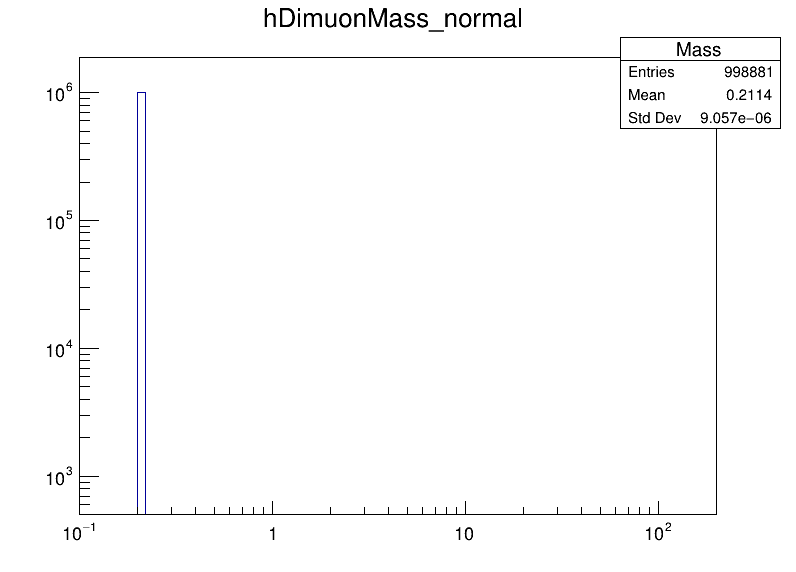

In [ ]:
# Plotting a simple histogram with the Dimuons' mass

hist1 = TH1F("Mass","hDimuonMass_normal",10000, 0.1,200)

#Iterating over events in order to fill the histogram with the dimuon invariant mass
maxEvents = f1.oniaTree.GetEntries()

for index, event in enumerate(f1.oniaTree):
  vecsum=event.muonP_p4+event.muonP_p4
  hist1.Fill(vecsum.M())
  if index > maxEvents:break

#Drawing the histogram, in the previously created canvas, with logarithmic axes
hist1.Draw()
c.SetLogy(True)
c.SetLogx(True)
c.Draw()

1708


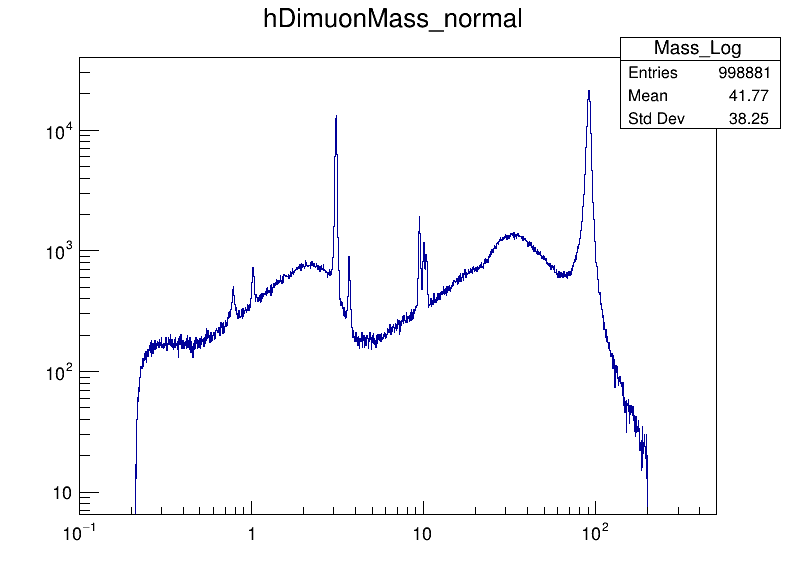

In [ ]:
# Plotting the Dimuon's mass in an histogram with variable bin widths

#Creating an array with values corresponding to each bin's width
maxbins = 100000
xbins = [0]*maxbins
xbins[0] = 0.1
nbins = 0
binproportion = 0.005
i = 1
while xbins[nbins]<500:
  xbins[i] = xbins[i-1]*(1+binproportion)
  nbins += 1
  i += 1
  if nbins >= maxbins: break
#xbins needs to be converted into an array (we have been using lists) because
# TH1F takes an array as input
xbinsarray = np.array(xbins)
print(nbins)


hist2 = TH1F("Mass_Log","hDimuonMass_normal", nbins, xbinsarray)

#Iterating over all events to fill the histogram
maxEvents = f1.oniaTree.GetEntries()

for index, event in enumerate(f1.oniaTree):
  hist2.Fill(event.dimuon_p4.M())
  if index > maxEvents:break

#Drawing the histogram
hist2.Draw()
c.SetLogy(True)
c.SetLogx(True)
c.Draw()

  1) 0x1372c930 RooRealVar:: mass = 3.05942  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1372c930 RooRealVar:: mass = 3.06918  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1372c930 RooRealVar:: mass = 3.01742  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1372c930 RooRealVar:: mass = 3.04232  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1372c930 RooRealVar:: mass = 3.26536  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1372c930 RooRealVar:: mass = 3.14628  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1372c930 RooRealVar:: mass = 3.25973  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1372c930 RooRealVar:: mass = 3.11157  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1372c930 RooRealVar:: mass = 3.10789  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
[#0] WARNING:InputArguments -- The parameter 'sigma' wi

cling::DynamicLibraryManager::loadLibrary(): libgsl.so.23: cannot open shared object file: No such file or directory


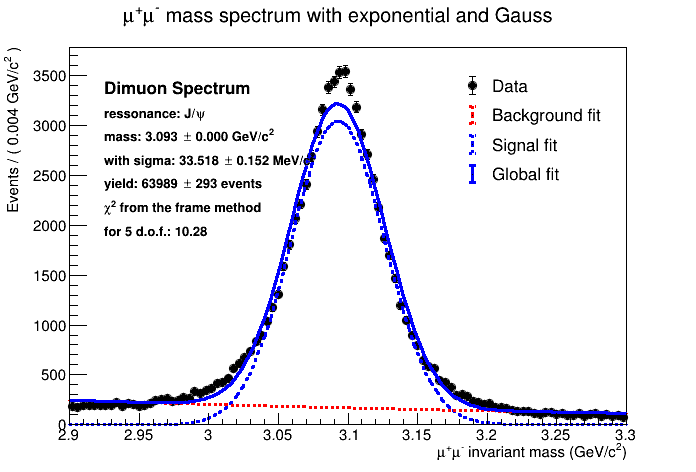

In [ ]:
#Making an unbinned Fit
#The main difference is that instead of feeding the model a RooDataHist
#we feed it a RooDataSet object

#Setting the mass limits of the peak
mmin = 2.9
mmax = 3.3

#Performing the mass cut a priori
#There are several ways of initiating a RooDataSet object
#One of them is by directly importing a TTree object
#If we do so, then we must define every variable in the TTree as a RooRealVar
#And we can perform the cuts directly on the RooDataSet when initiating it
#or afterwards with RooCut objects
masslist = []
for entry in f1.oniaTree:
  if mmin <= entry.dimuon_p4.M() <= mmax:
    masslist.append(entry.dimuon_p4.M())

#Create a Mass variable that RooFit can use, and importing the relevant dataset
mass = RooRealVar("mass", "#mu^{+}#mu^{-} invariant mass", mmin, mmax, "GeV/c^{2}")
ds = RooDataSet("ds","ds",RooArgSet(mass))

#We will set the entries one by one on the RooDataSet. This can be generalized
#for n dimensions with setValue() for each variable
#followed by ds.add(RooArgSet(mass, var0, var1, ..., varn))
for value in masslist:
  mass.setVal(value)
  ds.add(RooArgSet(mass))

#Simple way of checking the RooDataSet entries if you want to make sure that
#the RooDataSet has been correctly filled
for n in range(9):
  ds.get(n).Print("v")

#Define background model (exponential) and its parameters I chose this because everythign in particle physics are exponentials
Lambda = RooRealVar("lambda", "lambda", -0.3, -4.0, 0.0)
background = RooExponential("background", "background", mass, Lambda)

#Define signal model (Gaussian) and its parameters
mean = RooRealVar("mean", "mean", 0.5*(mmin+mmax), mmin, mmax)
sigma = RooRealVar("sigma", "sigma", 0.1*(mmax-mmin),0.,0.5*(mmax-mmin))
signal = RooGaussian("signal", "signal", mass, mean, sigma)

#Define variables for number of signal and background events
n_signal_initial = 0.8*ds.sumEntries()
n_back_initial = 0.2*ds.sumEntries()
n_signal = RooRealVar("n_signal","n_signal",n_signal_initial,0.,ds.sumEntries())
n_back = RooRealVar("n_back","n_back",n_back_initial,0.,ds.sumEntries())

#Sum signal and background models
model = RooAddPdf("model", "model", RooArgList(signal, background), RooArgList(n_signal, n_back))

#Perform the fit
model.fitTo(ds)

#Plot the fit
frame = mass.frame()
frame.SetTitle("#mu^{+}#mu^{-} mass spectrum with exponential and Gauss")

ds.plotOn(frame,RooFit.Name("ds"))
model.plotOn(frame,RooFit.Name("modelSig"),RooFit.Components("signal"),RooFit.LineStyle(ROOT.kDashed))
model.plotOn(frame,RooFit.Name("modelBkg"),RooFit.Components("background"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kRed))
model.plotOn(frame,RooFit.Name("model"))

roofit_canvas = ROOT.TCanvas()
frame.Draw()

#Draw a caption
legend = TLegend(0.65,0.6,0.88,0.85)
legend.SetBorderSize(0)
legend.SetTextFont(40)
legend.SetTextSize(0.04)
legend.AddEntry(frame.findObject("ds"),"Data","1pe")
legend.AddEntry(frame.findObject("modelBkg"),"Background fit","1pe")
legend.AddEntry(frame.findObject("modelSig"),"Signal fit","1pe")
legend.AddEntry(frame.findObject("model"),"Global fit","1pe")
legend.Draw()

#Display info and fit results
L = TLatex()
L.SetNDC()
L.SetTextSize(0.04)
L.DrawLatex(0.15,0.8,"Dimuon Spectrum")
L.SetTextSize(0.03)
L.DrawLatex(0.15,0.75,"ressonance: J/#psi")
L.DrawLatex(0.15,0.70,ROOT.Form("mass: %5.3f #pm %5.3f GeV/c^{2}" % (mean.getVal(),mean.getError())))
L.DrawLatex(0.15,0.65,ROOT.Form("with sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma.getVal()*1000,sigma.getError()*1000)))
L.DrawLatex(0.15,0.60,ROOT.Form("yield: %.0f #pm %.0f events" % (n_signal.getVal(),n_signal.getError())))
free_parameters = 5
L.DrawLatex(0.15,0.55,ROOT.Form("#chi^{2} from the frame method"))
L.DrawLatex(0.15,0.50,ROOT.Form("for 5 d.o.f.: %.2f" % frame.chiSquare(free_parameters)))

roofit_canvas.Draw()


[#0] WARNING:InputArguments -- The parameter 'sigma' with range [0, 0.2] of the RooGaussian 'signal' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (signal,background)
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 lambda      -3.00000e-01  1.50000e-01   -4.00000e+00  0.00000e+00
     2 mean         3.10000e+00  4.00000e-02    2.90000e+00  3.30000e+00
     3 n_back       1.62568e+04  8.12840e+03    0.00000e+00  8.12840e+04
     4 n_signal     6.50272e+04  8.12840e+03    0.00000e+00  8.12840e+04
     5 sigma        4.00000e-02  2.00000e-0

Warning in <TFile::Append>: Replacing existing TH1: Mass (Potential memory leak).


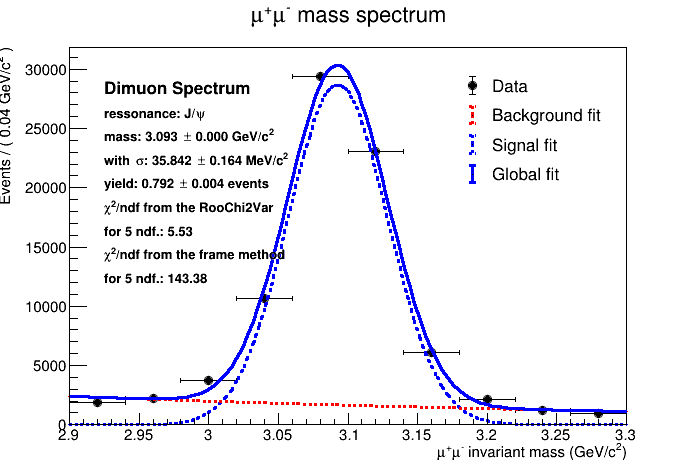

In [ ]:
# Fitting the J/Psi peak

#Setting the mass limits of the peak
mmin = 2.9
mmax = 3.3

hist3 = TH1F("Mass","hDimuonMass_peak",10, mmin, mmax)

#Filling the histogram with the relevant data
maxEvents = f1.oniaTree.GetEntries()

for index, event in enumerate(f1.oniaTree):
  hist3.Fill(event.dimuon_p4.M())
  if index > maxEvents: break

#Create a Mass variable that RooFit can use, and importing the relevant dataset
mass = RooRealVar("mass", "#mu^{+}#mu^{-} invariant mass", mmin, mmax, "GeV/c^{2}")
args = RooArgList(mass)
dh = RooDataHist("dh", "dh", args, hist3)

#Define background model (exponential) and its parameters
Lambda = RooRealVar("lambda", "lambda", -0.3, -4.0, 0.0)
background = RooExponential("background", "background", mass, Lambda)

#Define signal model (Gaussian) and its parameters
mean = RooRealVar("mean", "mean", 0.5*(mmin+mmax), mmin, mmax)
sigma = RooRealVar("sigma", "sigma", 0.1*(mmax-mmin),0.,0.5*(mmax-mmin))
signal = RooGaussian("signal", "signal", mass, mean, sigma)

#Define variables for number of signal and background events
n_signal_initial = 0.8*dh.sumEntries()
n_back_initial = 0.2*dh.sumEntries()
n_signal = RooRealVar("n_signal","n_signal",n_signal_initial,0.,dh.sumEntries())
n_back = RooRealVar("n_back","n_back",n_back_initial,0.,dh.sumEntries())

#Sum signal and background models
model = RooAddPdf("model", "model", RooArgList(signal, background), RooArgList(n_signal, n_back))

#Perform the fit
model.fitTo(dh)

#Plot the fit
frame = mass.frame()
frame.SetTitle("#mu^{+}#mu^{-} mass spectrum")

dh.plotOn(frame,RooFit.Name("dh"))
model.plotOn(frame,RooFit.Name("modelSig"),RooFit.Components("signal"),RooFit.LineStyle(ROOT.kDashed))
model.plotOn(frame,RooFit.Name("modelBkg"),RooFit.Components("background"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kRed))
model.plotOn(frame,RooFit.Name("model"))

roofit_canvas = ROOT.TCanvas()
frame.Draw()

#Draw a caption
legend = TLegend(0.65,0.6,0.88,0.85)
legend.SetBorderSize(0)
legend.SetTextFont(40)
legend.SetTextSize(0.04)
legend.AddEntry(frame.findObject("dh"),"Data","1pe")
legend.AddEntry(frame.findObject("modelBkg"),"Background fit","1pe")
legend.AddEntry(frame.findObject("modelSig"),"Signal fit","1pe")
legend.AddEntry(frame.findObject("model"),"Global fit","1pe")
legend.Draw()

#Display info and fit results
L = TLatex()
L.SetNDC()
L.SetTextSize(0.04)
L.DrawLatex(0.15,0.8,"Dimuon Spectrum")
L.SetTextSize(0.03)
L.DrawLatex(0.15,0.75,"ressonance: J/#psi")
L.DrawLatex(0.15,0.70,ROOT.Form("mass: %5.3f #pm %5.3f GeV/c^{2}" % (mean.getVal(),mean.getError())))
L.DrawLatex(0.15,0.65,ROOT.Form("with #sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma.getVal()*1000,sigma.getError()*1000)))
L.DrawLatex(0.15,0.60,ROOT.Form("yield: %.3f #pm %.3f events" % (float(n_signal.getVal())/dh.sumEntries(),float(n_signal.getError())/dh.sumEntries())))
chi = RooChi2Var("chi","chi^2",model,dh)
variables = 5 # This is the number of free parameters in our model, and the
              # number of degrees of freedom is the the number of points in our
              # model minus the free parameters
L.DrawLatex(0.15,0.55,ROOT.Form("#chi^{2}/ndf from the RooChi2Var"))
L.DrawLatex(0.15,0.50,ROOT.Form("for %i ndf.: %.2f" % (variables,(chi.getVal()/(100.-variables)))))
L.DrawLatex(0.15,0.45,ROOT.Form("#chi^{2}/ndf from the frame method"))
L.DrawLatex(0.15,0.40,ROOT.Form("for %i ndf.: %.2f" %  (variables,frame.chiSquare(variables))))

roofit_canvas.Draw()

*****
*****
*****
*****
PROJECT BEGINNING
*****
*****
*****






*****
*****
*****
*****
I picked the ρ+ω peak
*****
*****
*****



Warning in <TFile::Append>: Replacing existing TH1: Mass (Potential memory leak).


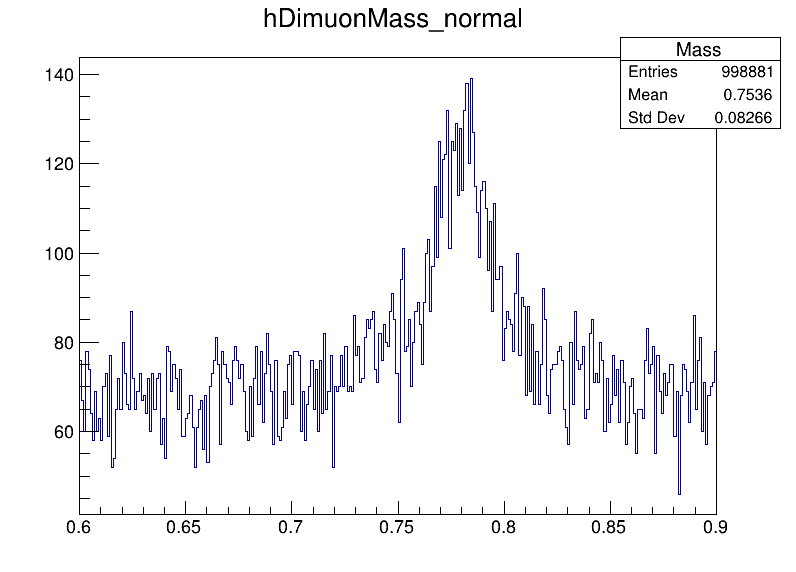

In [ ]:
# Plotting a simple histogram with the Dimuons' mass

hist3 = TH1F("Mass","hDimuonMass_normal",300, 0.6, 0.9)

#Iterating over events in order to fill the histogram with the dimuon invariant mass
maxEvents = f1.oniaTree.GetEntries()

for index, event in enumerate(f1.oniaTree):
  hist3.Fill(event.dimuon_p4.M())
  if index > maxEvents:break

#Drawing the histogram, in the previously created canvas, with logarithmic axes
hist3.Draw()
c.SetLogy(False)
c.SetLogx(False)
c.Draw()

  1) 0x14075480 RooRealVar:: mass = 0.847711  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14075480 RooRealVar:: mass = 0.783413  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14075480 RooRealVar:: mass = 0.600083  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14075480 RooRealVar:: mass = 0.870979  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14075480 RooRealVar:: mass = 0.765136  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14075480 RooRealVar:: mass = 0.697037  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14075480 RooRealVar:: mass = 0.78984  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14075480 RooRealVar:: mass = 0.801699  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14075480 RooRealVar:: mass = 0.64344  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
[#1] INFO:Minimization -- p.d.f. provides expect

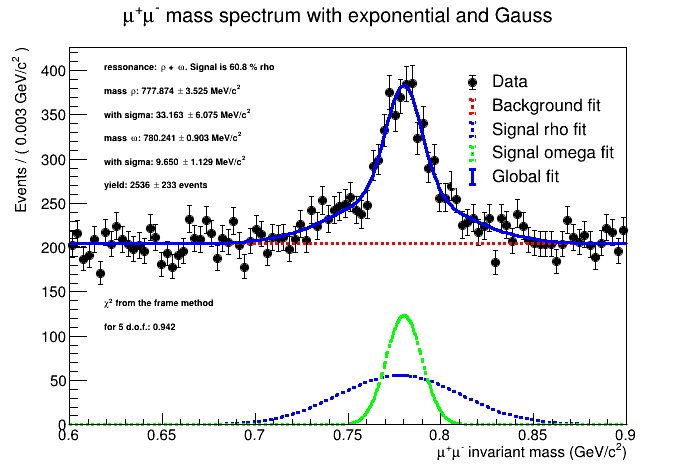

In [ ]:
#Making the GaussianSignal+ExponentialBKG fit with sigma intervals



#Making an unbinned Fit
#The main difference is that instead of feeding the model a RooDataHist
#we feed it a RooDataSet object

#Setting the mass limits of the peak
mmin = 0.6
mmax = 0.9

#Performing the mass cut a priori
#There are several ways of initiating a RooDataSet object
#One of them is by directly importing a TTree object
#If we do so, then we must define every variable in the TTree as a RooRealVar
#And we can perform the cuts directly on the RooDataSet when initiating it
#or afterwards with RooCut objects
masslist = []
for entry in f1.oniaTree:
  if mmin <= entry.dimuon_p4.M() <= mmax:
    masslist.append(entry.dimuon_p4.M())

#Create a Mass variable that RooFit can use, and importing the relevant dataset
mass = RooRealVar("mass", "#mu^{+}#mu^{-} invariant mass", mmin, mmax, "GeV/c^{2}")
ds = RooDataSet("ds","ds",RooArgSet(mass))

#We will set the entries one by one on the RooDataSet. This can be generalized
#for n dimensions with setValue() for each variable
#followed by ds.add(RooArgSet(mass, var0, var1, ..., varn))
for value in masslist:
  mass.setVal(value)
  ds.add(RooArgSet(mass))

#Simple way of checking the RooDataSet entries if you want to make sure that
#the RooDataSet has been correctly filled
for n in range(9):
  ds.get(n).Print("v")

#Define background model (exponential) and its parameters I chose this because everythign in particle physics are exponentials
Lambda = RooRealVar("lambda", "lambda", -30, -50, -0.0000000001)
background = RooExponential("background", "background", mass, Lambda)

#Define signal model (Gaussian) and its parameters
mean1 = RooRealVar("mean1", "mean1", 0.775, 0.6, 0.8)
sigma1 = RooRealVar("sigma1", "sigma1", 0.005,0.00001,0.1)
mean2 = RooRealVar("mean2", "mean2", 0.6, 0.778, 0.8)
sigma2 = RooRealVar("sigma2", "sigma2", 0.005,0.00001,0.01)
gauss1 = RooGaussian("signal1", "signal1", mass, mean1, sigma1)
gauss2 = RooGaussian("signal2", "signal2", mass, mean2, sigma2)
frac = RooRealVar("frac","fraction of signal that is rho",0.5,0.2,0.8) ;
signal=RooAddPdf("sig","Signal",RooArgList(gauss1,gauss2),RooArgList(frac)) ;


#Define variables for number of signal and background events
n_signal_initial = 0.8*ds.sumEntries()
n_back_initial = 0.2*ds.sumEntries()
n_signal = RooRealVar("n_signal","n_signal",n_signal_initial,0.,ds.sumEntries())
n_back = RooRealVar("n_back","n_back",n_back_initial,0.,ds.sumEntries())

#Sum signal and background models
model = RooAddPdf("model", "model", RooArgList(signal, background), RooArgList(n_signal, n_back))

#Perform the fit
model.fitTo(ds)

#Plot the fit
frame = mass.frame()
frame.SetTitle("#mu^{+}#mu^{-} mass spectrum with exponential and Gauss")

ds.plotOn(frame,RooFit.Name("ds"))
model.plotOn(frame,RooFit.Name("modelSig1"),RooFit.Components("signal1"),RooFit.LineStyle(ROOT.kDashed))
model.plotOn(frame,RooFit.Name("modelSig2"),RooFit.Components("signal2"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kGreen))
model.plotOn(frame,RooFit.Name("modelBkg"),RooFit.Components("background"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kRed))
model.plotOn(frame,RooFit.Name("model"))

roofit_canvas = ROOT.TCanvas()
frame.Draw()

#Draw a caption
legend = TLegend(0.65,0.6,0.88,0.85)
legend.SetBorderSize(0)
legend.SetTextFont(40)
legend.SetTextSize(0.04)
legend.AddEntry(frame.findObject("ds"),"Data","1pe")
legend.AddEntry(frame.findObject("modelBkg"),"Background fit","1pe")
legend.AddEntry(frame.findObject("modelSig1"),"Signal rho fit","1pe")
legend.AddEntry(frame.findObject("modelSig2"),"Signal omega fit","1pe")
legend.AddEntry(frame.findObject("model"),"Global fit","1pe")
legend.Draw()

#Display info and fit results
L = TLatex()
L.SetNDC()

L.SetTextSize(0.02)
L.DrawLatex(0.15,0.85,ROOT.Form("ressonance: #rho + #omega. Signal is %3.1f %% rho" % (frac.getVal()*100)))
L.DrawLatex(0.15,0.80,ROOT.Form("mass #rho: %5.3f #pm %5.3f MeV/c^{2}" % (mean1.getVal()*1000,mean1.getError()*1000)))
L.DrawLatex(0.15,0.75,ROOT.Form("with sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma1.getVal()*1000,sigma1.getError()*1000)))
L.DrawLatex(0.15,0.70,ROOT.Form("mass #omega: %5.3f #pm %5.3f MeV/c^{2}" % (mean2.getVal()*1000,mean2.getError()*1000)))
L.DrawLatex(0.15,0.65,ROOT.Form("with sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma2.getVal()*1000,sigma2.getError()*1000)))
L.DrawLatex(0.15,0.60,ROOT.Form("yield: %.0f #pm %.0f events" % (n_signal.getVal(),n_signal.getError())))
free_parameters = 5
L.DrawLatex(0.15,0.35,ROOT.Form("#chi^{2} from the frame method"))
L.DrawLatex(0.15,0.30,ROOT.Form("for 5 d.o.f.: %.3f" % frame.chiSquare(free_parameters)))

roofit_canvas.Draw()


  1) 0x3831690 RooRealVar:: mass = 0.847711  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x3831690 RooRealVar:: mass = 0.783413  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x3831690 RooRealVar:: mass = 0.600083  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x3831690 RooRealVar:: mass = 0.870979  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x3831690 RooRealVar:: mass = 0.765136  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x3831690 RooRealVar:: mass = 0.697037  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x3831690 RooRealVar:: mass = 0.78984  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x3831690 RooRealVar:: mass = 0.801699  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x3831690 RooRealVar:: mass = 0.64344  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
[#1] INFO:Minimization -- p.d.f. provides expected number

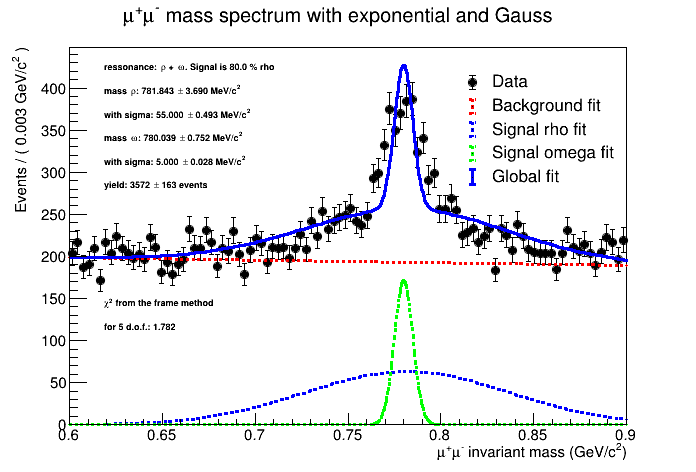

In [ ]:
#Making the GaussianSignal+ExponentialBKG fit with stricter constraints on width


#Making an unbinned Fit
#The main difference is that instead of feeding the model a RooDataHist
#we feed it a RooDataSet object

#Setting the mass limits of the peak
mmin = 0.6
mmax = 0.9

#Performing the mass cut a priori
#There are several ways of initiating a RooDataSet object
#One of them is by directly importing a TTree object
#If we do so, then we must define every variable in the TTree as a RooRealVar
#And we can perform the cuts directly on the RooDataSet when initiating it
#or afterwards with RooCut objects
masslist = []
for entry in f1.oniaTree:
  if mmin <= entry.dimuon_p4.M() <= mmax:
    masslist.append(entry.dimuon_p4.M())

#Create a Mass variable that RooFit can use, and importing the relevant dataset
mass = RooRealVar("mass", "#mu^{+}#mu^{-} invariant mass", mmin, mmax, "GeV/c^{2}")
ds = RooDataSet("ds","ds",RooArgSet(mass))

#We will set the entries one by one on the RooDataSet. This can be generalized
#for n dimensions with setValue() for each variable
#followed by ds.add(RooArgSet(mass, var0, var1, ..., varn))
for value in masslist:
  mass.setVal(value)
  ds.add(RooArgSet(mass))

#Simple way of checking the RooDataSet entries if you want to make sure that
#the RooDataSet has been correctly filled
for n in range(9):
  ds.get(n).Print("v")

#Define background model (exponential) and its parameters I chose this because everythign in particle physics are exponentials
Lambda = RooRealVar("lambda", "lambda", -30, -50, -0.0000000001)
background = RooExponential("background", "background", mass, Lambda)

#Define signal model (Gaussian) and its parameters
mean1 = RooRealVar("mean1", "mean1", 0.775, 0.6, 0.8)
sigma1 = RooRealVar("sigma1", "sigma1", 0.065,0.055,0.075)#FWHM= particle width= 2.4 sigma in a gaussian, for rho should be aroun 65MeV
mean2 = RooRealVar("mean2", "mean2", 0.782, 0.6, 0.8)
sigma2 = RooRealVar("sigma2", "sigma2", 0.003,0.0001,0.005)#FWHM= particle width= 2.4 sigma in a gaussian, for omega should be around 3 MeV
gauss1 = RooGaussian("signal1", "signal1", mass, mean1, sigma1)
gauss2 = RooGaussian("signal2", "signal2", mass, mean2, sigma2)
frac = RooRealVar("frac","fraction of signal that is rho",0.5,0.2,0.8) ;
signal=RooAddPdf("sig","Signal",RooArgList(gauss1,gauss2),RooArgList(frac)) ;


#Define variables for number of signal and background events
n_signal_initial = 0.8*ds.sumEntries()
n_back_initial = 0.2*ds.sumEntries()
n_signal = RooRealVar("n_signal","n_signal",n_signal_initial,0.,ds.sumEntries())
n_back = RooRealVar("n_back","n_back",n_back_initial,0.,ds.sumEntries())

#Sum signal and background models
model = RooAddPdf("model", "model", RooArgList(signal, background), RooArgList(n_signal, n_back))

#Perform the fit
model.fitTo(ds)

#Plot the fit
frame = mass.frame()
frame.SetTitle("#mu^{+}#mu^{-} mass spectrum with exponential and Gauss")

ds.plotOn(frame,RooFit.Name("ds"))
model.plotOn(frame,RooFit.Name("modelSig1"),RooFit.Components("signal1"),RooFit.LineStyle(ROOT.kDashed))
model.plotOn(frame,RooFit.Name("modelSig2"),RooFit.Components("signal2"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kGreen))
model.plotOn(frame,RooFit.Name("modelBkg"),RooFit.Components("background"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kRed))
model.plotOn(frame,RooFit.Name("model"))

roofit_canvas = ROOT.TCanvas()
frame.Draw()

#Draw a caption
legend = TLegend(0.65,0.6,0.88,0.85)
legend.SetBorderSize(0)
legend.SetTextFont(40)
legend.SetTextSize(0.04)
legend.AddEntry(frame.findObject("ds"),"Data","1pe")
legend.AddEntry(frame.findObject("modelBkg"),"Background fit","1pe")
legend.AddEntry(frame.findObject("modelSig1"),ROOT.Form("Signal rho fit"),"1pe")
legend.AddEntry(frame.findObject("modelSig2"),ROOT.Form("Signal omega fit"),"1pe")
legend.AddEntry(frame.findObject("model"),"Global fit","1pe")
legend.Draw()

#Display info and fit results
L = TLatex()
L.SetNDC()

L.SetTextSize(0.02)
L.DrawLatex(0.15,0.85,ROOT.Form("ressonance: #rho + #omega. Signal is %3.1f %% rho" % (frac.getVal()*100)))
L.DrawLatex(0.15,0.80,ROOT.Form("mass #rho: %5.3f #pm %5.3f MeV/c^{2}" % (mean1.getVal()*1000,mean1.getError()*1000)))
L.DrawLatex(0.15,0.75,ROOT.Form("with sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma1.getVal()*1000,sigma1.getError()*1000)))
L.DrawLatex(0.15,0.70,ROOT.Form("mass #omega: %5.3f #pm %5.3f MeV/c^{2}" % (mean2.getVal()*1000,mean2.getError()*1000)))
L.DrawLatex(0.15,0.65,ROOT.Form("with sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma2.getVal()*1000,sigma2.getError()*1000)))
L.DrawLatex(0.15,0.60,ROOT.Form("yield: %.0f #pm %.0f events" % (n_signal.getVal(),n_signal.getError())))
free_parameters = 5
L.DrawLatex(0.15,0.35,ROOT.Form("#chi^{2} from the frame method"))
L.DrawLatex(0.15,0.30,ROOT.Form("for 5 d.o.f.: %.3f" % frame.chiSquare(free_parameters)))

roofit_canvas.Draw()


RooRealVar::sigma1 = 0.0633121  L(0.063312 - 0.0633122) 

  1) 0x14eacf50 RooRealVar:: mass = 0.847711  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14eacf50 RooRealVar:: mass = 0.783413  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14eacf50 RooRealVar:: mass = 0.600083  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14eacf50 RooRealVar:: mass = 0.870979  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14eacf50 RooRealVar:: mass = 0.765136  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14eacf50 RooRealVar:: mass = 0.697037  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14eacf50 RooRealVar:: mass = 0.78984  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14eacf50 RooRealVar:: mass = 0.801699  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14eacf50 RooRealVar:: mass = 0.64344  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invari

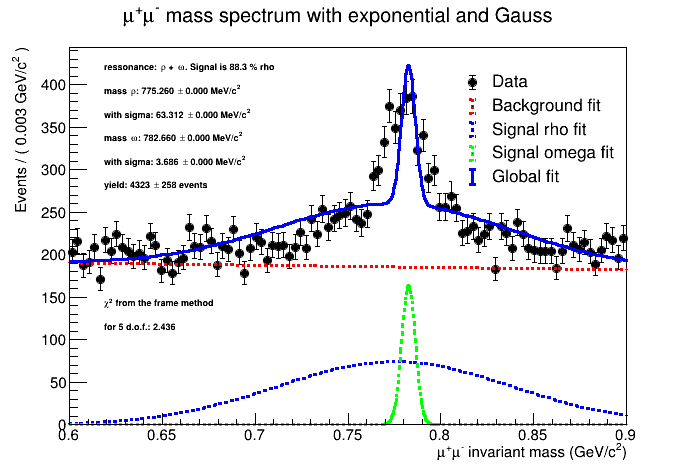

In [ ]:
#Making the GaussianSignal+ExponentialBKG fit with fixed gaussians to study frac

#Making an unbinned Fit
#The main difference is that instead of feeding the model a RooDataHist
#we feed it a RooDataSet object

#Setting the mass limits of the peak
mmin = 0.6
mmax = 0.9

#Performing the mass cut a priori
#There are several ways of initiating a RooDataSet object
#One of them is by directly importing a TTree object
#If we do so, then we must define every variable in the TTree as a RooRealVar
#And we can perform the cuts directly on the RooDataSet when initiating it
#or afterwards with RooCut objects
masslist = []
for entry in f1.oniaTree:
  if mmin <= entry.dimuon_p4.M() <= mmax:
    masslist.append(entry.dimuon_p4.M())

#Create a Mass variable that RooFit can use, and importing the relevant dataset
mass = RooRealVar("mass", "#mu^{+}#mu^{-} invariant mass", mmin, mmax, "GeV/c^{2}")
ds = RooDataSet("ds","ds",RooArgSet(mass))

#We will set the entries one by one on the RooDataSet. This can be generalized
#for n dimensions with setValue() for each variable
#followed by ds.add(RooArgSet(mass, var0, var1, ..., varn))
for value in masslist:
  mass.setVal(value)
  ds.add(RooArgSet(mass))

#Simple way of checking the RooDataSet entries if you want to make sure that
#the RooDataSet has been correctly filled
for n in range(9):
  ds.get(n).Print("v")

#Define background model (exponential) and its parameters I chose this because everythign in particle physics are exponentials
Lambda = RooRealVar("lambda", "lambda", -30, -50, -0.0000000001)
background = RooExponential("background", "background", mass, Lambda)

#Define signal model (Gaussian) and its parameters
mean1 = RooRealVar("mean1", "mean1", 0.77526, 0.77526-0.0000001, 0.77526+0.0000001)
sigma1 = RooRealVar("sigma1", "sigma1", 0.1491/2.355,0.1491/2.355-0.0000001,0.1491/2.355+0.0000001)#FWHM= particle width= 2.4 sigma in a gaussian, for rho should be aroun 65MeV
mean2 = RooRealVar("mean2", "mean2", 0.78266,0.78266-0.0000001, 0.78266+0.0000001)
sigma2 = RooRealVar("sigma2", "sigma2", 0.00868/2.355,0.00868/2.355-0.0000001,0.00868/2.355+0.0000001)#FWHM= particle width= 2.4 sigma in a gaussian, for omega should be around 3 MeV


print(sigma1)
gauss1 = RooGaussian("signal1", "signal1", mass, mean1, sigma1)
gauss2 = RooGaussian("signal2", "signal2", mass, mean2, sigma2)
frac = RooRealVar("frac","fraction of signal that is rho",0.5,0,1) ;
signal=RooAddPdf("sig","Signal",RooArgList(gauss1,gauss2),RooArgList(frac)) ;


#Define variables for number of signal and background events
n_signal_initial = 0.8*ds.sumEntries()
n_back_initial = 0.2*ds.sumEntries()
n_signal = RooRealVar("n_signal","n_signal",n_signal_initial,0.,ds.sumEntries())
n_back = RooRealVar("n_back","n_back",n_back_initial,0.,ds.sumEntries())

#Sum signal and background models
model = RooAddPdf("model", "model", RooArgList(signal, background), RooArgList(n_signal, n_back))

#Perform the fit
model.fitTo(ds)

#Plot the fit
frame = mass.frame()
frame.SetTitle("#mu^{+}#mu^{-} mass spectrum with exponential and Gauss")

ds.plotOn(frame,RooFit.Name("ds"))
model.plotOn(frame,RooFit.Name("modelSig1"),RooFit.Components("signal1"),RooFit.LineStyle(ROOT.kDashed))
model.plotOn(frame,RooFit.Name("modelSig2"),RooFit.Components("signal2"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kGreen))
model.plotOn(frame,RooFit.Name("modelBkg"),RooFit.Components("background"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kRed))
model.plotOn(frame,RooFit.Name("model"))

roofit_canvas = ROOT.TCanvas()
frame.Draw()

#Draw a caption
legend = TLegend(0.65,0.6,0.88,0.85)
legend.SetBorderSize(0)
legend.SetTextFont(40)
legend.SetTextSize(0.04)
legend.AddEntry(frame.findObject("ds"),"Data","1pe")
legend.AddEntry(frame.findObject("modelBkg"),"Background fit","1pe")
legend.AddEntry(frame.findObject("modelSig1"),ROOT.Form("Signal rho fit"),"1pe")
legend.AddEntry(frame.findObject("modelSig2"),ROOT.Form("Signal omega fit"),"1pe")
legend.AddEntry(frame.findObject("model"),"Global fit","1pe")
legend.Draw()

#Display info and fit results
L = TLatex()
L.SetNDC()

L.SetTextSize(0.02)
L.DrawLatex(0.15,0.85,ROOT.Form("ressonance: #rho + #omega. Signal is %3.1f %% rho" % (frac.getVal()*100)))
L.DrawLatex(0.15,0.80,ROOT.Form("mass #rho: %5.3f #pm %5.3f MeV/c^{2}" % (mean1.getVal()*1000,mean1.getError()*1000)))
L.DrawLatex(0.15,0.75,ROOT.Form("with sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma1.getVal()*1000,sigma1.getError()*1000)))
L.DrawLatex(0.15,0.70,ROOT.Form("mass #omega: %5.3f #pm %5.3f MeV/c^{2}" % (mean2.getVal()*1000,mean2.getError()*1000)))
L.DrawLatex(0.15,0.65,ROOT.Form("with sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma2.getVal()*1000,sigma2.getError()*1000)))
L.DrawLatex(0.15,0.60,ROOT.Form("yield: %.0f #pm %.0f events" % (n_signal.getVal(),n_signal.getError())))
free_parameters = 5
L.DrawLatex(0.15,0.35,ROOT.Form("#chi^{2} from the frame method"))
L.DrawLatex(0.15,0.30,ROOT.Form("for 5 d.o.f.: %.3f" % frame.chiSquare(free_parameters)))

roofit_canvas.Draw()


  1) 0x1414ea30 RooRealVar:: mass = 0.847711  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1414ea30 RooRealVar:: mass = 0.783413  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1414ea30 RooRealVar:: mass = 0.600083  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1414ea30 RooRealVar:: mass = 0.870979  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1414ea30 RooRealVar:: mass = 0.765136  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1414ea30 RooRealVar:: mass = 0.697037  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1414ea30 RooRealVar:: mass = 0.78984  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1414ea30 RooRealVar:: mass = 0.801699  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1414ea30 RooRealVar:: mass = 0.64344  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
[#1] INFO:Minimization -- p.d.f. provides expect

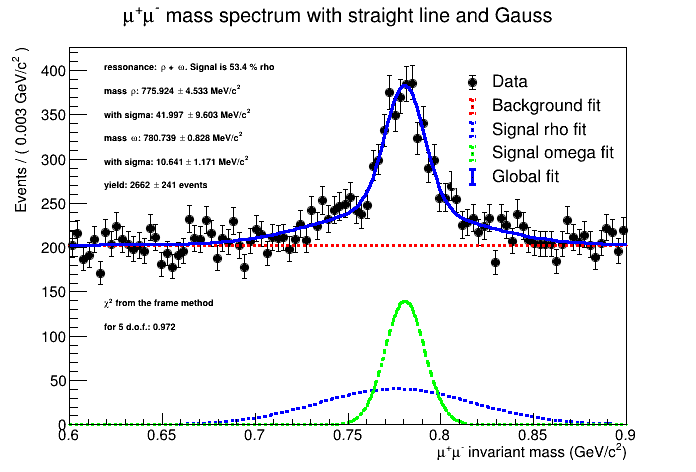

In [ ]:
#Making the GaussianSignal+StraightLineBKG fit with loose signal intervals


#Making an unbinned Fit
#The main difference is that instead of feeding the model a RooDataHist
#we feed it a RooDataSet object

#Setting the mass limits of the peak
mmin = 0.6
mmax = 0.9

#Performing the mass cut a priori
#There are several ways of initiating a RooDataSet object
#One of them is by directly importing a TTree object
#If we do so, then we must define every variable in the TTree as a RooRealVar
#And we can perform the cuts directly on the RooDataSet when initiating it
#or afterwards with RooCut objects
masslist = []
for entry in f1.oniaTree:
  if mmin <= entry.dimuon_p4.M() <= mmax:
    masslist.append(entry.dimuon_p4.M())

#Create a Mass variable that RooFit can use, and importing the relevant dataset
mass = RooRealVar("mass", "#mu^{+}#mu^{-} invariant mass", mmin, mmax, "GeV/c^{2}")
ds = RooDataSet("ds","ds",RooArgSet(mass))

#We will set the entries one by one on the RooDataSet. This can be generalized
#for n dimensions with setValue() for each variable
#followed by ds.add(RooArgSet(mass, var0, var1, ..., varn))
for value in masslist:
  mass.setVal(value)
  ds.add(RooArgSet(mass))

#Simple way of checking the RooDataSet entries if you want to make sure that
#the RooDataSet has been correctly filled
for n in range(9):
  ds.get(n).Print("v")

#Define background model (degree 1 polinomial) since it looks constant, but i wanted to give it some leniency
m = RooRealVar("m", "slope", 0, -2, 2)
background = RooPolynomial("background", "background",mass, m,0)

#Define signal model (Gaussian) and its parameters
mean1 = RooRealVar("mean1", "mean1", 0.775, 0.6, 0.8)
sigma1 = RooRealVar("sigma1", "sigma1", 0.005,0.00001,0.1)
mean2 = RooRealVar("mean2", "mean2", 0.782, 0.6, 0.8)
sigma2 = RooRealVar("sigma2", "sigma2", 0.005,0.00001,0.02)
gauss1 = RooGaussian("signal1", "signal1", mass, mean1, sigma1)
gauss2 = RooGaussian("signal2", "signal2", mass, mean2, sigma2)
frac = RooRealVar("frac","fraction of signal that is rho",0.5,0.2,0.8) ;
signal=RooAddPdf("sig","Signal",RooArgList(gauss1,gauss2),RooArgList(frac)) ;



#Define variables for number of signal and background events
n_signal_initial = 0.8*ds.sumEntries()
n_back_initial = 0.2*ds.sumEntries()
n_signal = RooRealVar("n_signal","n_signal",n_signal_initial,0.,ds.sumEntries())
n_back = RooRealVar("n_back","n_back",n_back_initial,0.,ds.sumEntries())

#Sum signal and background models
model = RooAddPdf("model", "model", RooArgList(signal, background), RooArgList(n_signal, n_back))

#Perform the fit
model.fitTo(ds)

#Plot the fit
frame = mass.frame()
frame.SetTitle("#mu^{+}#mu^{-} mass spectrum with straight line and Gauss")

ds.plotOn(frame,RooFit.Name("ds"))
model.plotOn(frame,RooFit.Name("modelSig1"),RooFit.Components("signal1"),RooFit.LineStyle(ROOT.kDashed))
model.plotOn(frame,RooFit.Name("modelSig2"),RooFit.Components("signal2"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kGreen))
model.plotOn(frame,RooFit.Name("modelBkg"),RooFit.Components("background"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kRed))
model.plotOn(frame,RooFit.Name("model"))

roofit_canvas = ROOT.TCanvas()
frame.Draw()

#Draw a caption
legend = TLegend(0.65,0.6,0.88,0.85)
legend.SetBorderSize(0)
legend.SetTextFont(40)
legend.SetTextSize(0.04)
legend.AddEntry(frame.findObject("ds"),"Data","1pe")
legend.AddEntry(frame.findObject("modelBkg"),"Background fit","1pe")
legend.AddEntry(frame.findObject("modelSig1"),"Signal rho fit","1pe")
legend.AddEntry(frame.findObject("modelSig2"),"Signal omega fit","1pe")
legend.AddEntry(frame.findObject("model"),"Global fit","1pe")
legend.Draw()

#Display info and fit results
L = TLatex()
L.SetNDC()

L.SetTextSize(0.02)
L.DrawLatex(0.15,0.85,ROOT.Form("ressonance: #rho + #omega. Signal is %3.1f %% rho" % (frac.getVal()*100)))
L.DrawLatex(0.15,0.80,ROOT.Form("mass #rho: %5.3f #pm %5.3f MeV/c^{2}" % (mean1.getVal()*1000,mean1.getError()*1000)))
L.DrawLatex(0.15,0.75,ROOT.Form("with sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma1.getVal()*1000,sigma1.getError()*1000)))
L.DrawLatex(0.15,0.70,ROOT.Form("mass #omega: %5.3f #pm %5.3f MeV/c^{2}" % (mean2.getVal()*1000,mean2.getError()*1000)))
L.DrawLatex(0.15,0.65,ROOT.Form("with sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma2.getVal()*1000,sigma2.getError()*1000)))
L.DrawLatex(0.15,0.60,ROOT.Form("yield: %.0f #pm %.0f events" % (n_signal.getVal(),n_signal.getError())))
free_parameters = 5
L.DrawLatex(0.15,0.35,ROOT.Form("#chi^{2} from the frame method"))
L.DrawLatex(0.15,0.30,ROOT.Form("for 5 d.o.f.: %.3f" % frame.chiSquare(free_parameters)))

roofit_canvas.Draw()


  1) 0x14ce6980 RooRealVar:: mass = 0.847711  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14ce6980 RooRealVar:: mass = 0.783413  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14ce6980 RooRealVar:: mass = 0.600083  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14ce6980 RooRealVar:: mass = 0.870979  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14ce6980 RooRealVar:: mass = 0.765136  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14ce6980 RooRealVar:: mass = 0.697037  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14ce6980 RooRealVar:: mass = 0.78984  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14ce6980 RooRealVar:: mass = 0.801699  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14ce6980 RooRealVar:: mass = 0.64344  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
[#1] INFO:Minimization -- p.d.f. provides expect

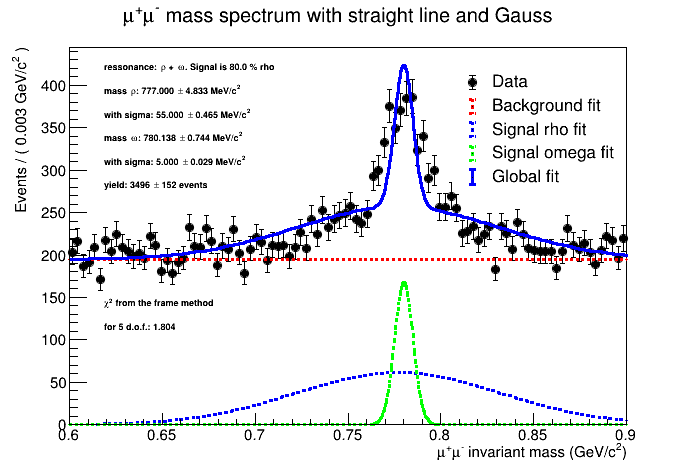

In [ ]:
#Making the GaussianSignal+StraightLineBKG fit with tighter sigma restraints


#Making an unbinned Fit
#The main difference is that instead of feeding the model a RooDataHist
#we feed it a RooDataSet object

#Setting the mass limits of the peak
mmin = 0.6
mmax = 0.9

#Performing the mass cut a priori
#There are several ways of initiating a RooDataSet object
#One of them is by directly importing a TTree object
#If we do so, then we must define every variable in the TTree as a RooRealVar
#And we can perform the cuts directly on the RooDataSet when initiating it
#or afterwards with RooCut objects
masslist = []
for entry in f1.oniaTree:
  if mmin <= entry.dimuon_p4.M() <= mmax:
    masslist.append(entry.dimuon_p4.M())

#Create a Mass variable that RooFit can use, and importing the relevant dataset
mass = RooRealVar("mass", "#mu^{+}#mu^{-} invariant mass", mmin, mmax, "GeV/c^{2}")
ds = RooDataSet("ds","ds",RooArgSet(mass))

#We will set the entries one by one on the RooDataSet. This can be generalized
#for n dimensions with setValue() for each variable
#followed by ds.add(RooArgSet(mass, var0, var1, ..., varn))
for value in masslist:
  mass.setVal(value)
  ds.add(RooArgSet(mass))

#Simple way of checking the RooDataSet entries if you want to make sure that
#the RooDataSet has been correctly filled
for n in range(9):
  ds.get(n).Print("v")

#Define background model (degree 1 polinomial) since it looks constant, but i wanted to give it some leniency
m = RooRealVar("m", "slope", 0, -2, 2)
background = RooPolynomial("background", "background",mass, m,0)

#Define signal model (Gaussian) and its parameters
mean1 = RooRealVar("mean1", "mean1", 0.775, 0.6, 0.8)
sigma1 = RooRealVar("sigma1", "sigma1", 0.065,0.055,0.075)#FWHM= particle width= 2.4 sigma in a gaussian, for rho should be aroun 65MeV
mean2 = RooRealVar("mean2", "mean2", 0.782, 0.778, 0.785)
sigma2 = RooRealVar("sigma2", "sigma2", 0.003,0.0001,0.005)#FWHM= particle width= 2.4 sigma in a gaussian, for omega should be around 3 MeV
gauss1 = RooGaussian("signal1", "signal1", mass, mean1, sigma1)
gauss2 = RooGaussian("signal2", "signal2", mass, mean2, sigma2)
frac = RooRealVar("frac","fraction of signal that is rho",0.5,0.2,0.8) ;
signal=RooAddPdf("sig","Signal",RooArgList(gauss1,gauss2),RooArgList(frac)) ;



#Define variables for number of signal and background events
n_signal_initial = 0.8*ds.sumEntries()
n_back_initial = 0.2*ds.sumEntries()
n_signal = RooRealVar("n_signal","n_signal",n_signal_initial,0.,ds.sumEntries())
n_back = RooRealVar("n_back","n_back",n_back_initial,0.,ds.sumEntries())

#Sum signal and background models
model = RooAddPdf("model", "model", RooArgList(signal, background), RooArgList(n_signal, n_back))

#Perform the fit
model.fitTo(ds)

#Plot the fit
frame = mass.frame()
frame.SetTitle("#mu^{+}#mu^{-} mass spectrum with straight line and Gauss")

ds.plotOn(frame,RooFit.Name("ds"))
model.plotOn(frame,RooFit.Name("modelSig1"),RooFit.Components("signal1"),RooFit.LineStyle(ROOT.kDashed))
model.plotOn(frame,RooFit.Name("modelSig2"),RooFit.Components("signal2"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kGreen))
model.plotOn(frame,RooFit.Name("modelBkg"),RooFit.Components("background"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kRed))
model.plotOn(frame,RooFit.Name("model"))

roofit_canvas = ROOT.TCanvas()
frame.Draw()

#Draw a caption
legend = TLegend(0.65,0.6,0.88,0.85)
legend.SetBorderSize(0)
legend.SetTextFont(40)
legend.SetTextSize(0.04)
legend.AddEntry(frame.findObject("ds"),"Data","1pe")
legend.AddEntry(frame.findObject("modelBkg"),"Background fit","1pe")
legend.AddEntry(frame.findObject("modelSig1"),"Signal rho fit","1pe")
legend.AddEntry(frame.findObject("modelSig2"),"Signal omega fit","1pe")
legend.AddEntry(frame.findObject("model"),"Global fit","1pe")
legend.Draw()

#Display info and fit results
L = TLatex()
L.SetNDC()

L.SetTextSize(0.02)
L.DrawLatex(0.15,0.85,ROOT.Form("ressonance: #rho + #omega. Signal is %3.1f %% rho" % (frac.getVal()*100)))
L.DrawLatex(0.15,0.80,ROOT.Form("mass #rho: %5.3f #pm %5.3f MeV/c^{2}" % (mean1.getVal()*1000,mean1.getError()*1000)))
L.DrawLatex(0.15,0.75,ROOT.Form("with sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma1.getVal()*1000,sigma1.getError()*1000)))
L.DrawLatex(0.15,0.70,ROOT.Form("mass #omega: %5.3f #pm %5.3f MeV/c^{2}" % (mean2.getVal()*1000,mean2.getError()*1000)))
L.DrawLatex(0.15,0.65,ROOT.Form("with sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma2.getVal()*1000,sigma2.getError()*1000)))
L.DrawLatex(0.15,0.60,ROOT.Form("yield: %.0f #pm %.0f events" % (n_signal.getVal(),n_signal.getError())))
free_parameters = 5
L.DrawLatex(0.15,0.35,ROOT.Form("#chi^{2} from the frame method"))
L.DrawLatex(0.15,0.30,ROOT.Form("for 5 d.o.f.: %.3f" % frame.chiSquare(free_parameters)))

roofit_canvas.Draw()


RooRealVar::sigma1 = 0.0633121  L(0.063312 - 0.0633122) 

  1) 0x11e1a570 RooRealVar:: mass = 0.847711  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x11e1a570 RooRealVar:: mass = 0.783413  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x11e1a570 RooRealVar:: mass = 0.600083  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x11e1a570 RooRealVar:: mass = 0.870979  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x11e1a570 RooRealVar:: mass = 0.765136  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x11e1a570 RooRealVar:: mass = 0.697037  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x11e1a570 RooRealVar:: mass = 0.78984  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x11e1a570 RooRealVar:: mass = 0.801699  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x11e1a570 RooRealVar:: mass = 0.64344  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invari

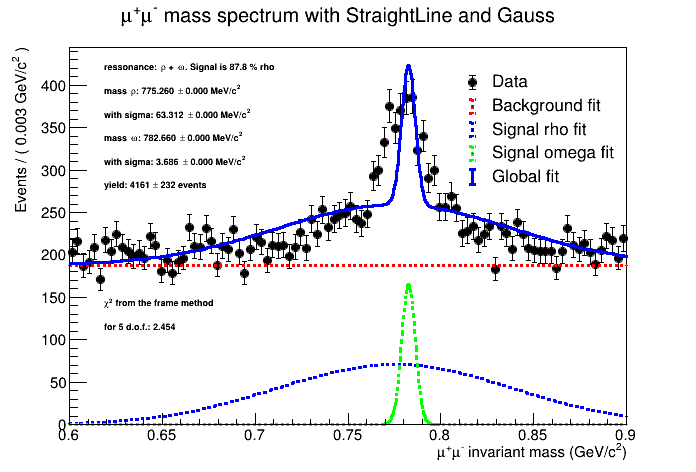

In [ ]:
#Making the GaussianSignal+StraigthLinelBKG fit with fixed gaussians to study frac

#Making an unbinned Fit
#The main difference is that instead of feeding the model a RooDataHist
#we feed it a RooDataSet object

#Setting the mass limits of the peak
mmin = 0.6
mmax = 0.9

#Performing the mass cut a priori
#There are several ways of initiating a RooDataSet object
#One of them is by directly importing a TTree object
#If we do so, then we must define every variable in the TTree as a RooRealVar
#And we can perform the cuts directly on the RooDataSet when initiating it
#or afterwards with RooCut objects
masslist = []
for entry in f1.oniaTree:
  if mmin <= entry.dimuon_p4.M() <= mmax:
    masslist.append(entry.dimuon_p4.M())

#Create a Mass variable that RooFit can use, and importing the relevant dataset
mass = RooRealVar("mass", "#mu^{+}#mu^{-} invariant mass", mmin, mmax, "GeV/c^{2}")
ds = RooDataSet("ds","ds",RooArgSet(mass))

#We will set the entries one by one on the RooDataSet. This can be generalized
#for n dimensions with setValue() for each variable
#followed by ds.add(RooArgSet(mass, var0, var1, ..., varn))
for value in masslist:
  mass.setVal(value)
  ds.add(RooArgSet(mass))

#Simple way of checking the RooDataSet entries if you want to make sure that
#the RooDataSet has been correctly filled
for n in range(9):
  ds.get(n).Print("v")

#Define background model (exponential) and its parameters I chose this because everythign in particle physics are exponentials
m = RooRealVar("m", "slope", 0, -2, 2)
background = RooPolynomial("background", "background",mass, m,0)

#Define signal model (Gaussian) and its parameters
mean1 = RooRealVar("mean1", "mean1", 0.77526, 0.77526-0.0000001, 0.77526+0.0000001)
sigma1 = RooRealVar("sigma1", "sigma1", 0.1491/2.355,0.1491/2.355-0.0000001,0.1491/2.355+0.0000001)#FWHM= particle width= 2.4 sigma in a gaussian, for rho should be aroun 65MeV
mean2 = RooRealVar("mean2", "mean2", 0.78266,0.78266-0.0000001, 0.78266+0.0000001)
sigma2 = RooRealVar("sigma2", "sigma2", 0.00868/2.355,0.00868/2.355-0.0000001,0.00868/2.355+0.0000001)#FWHM= particle width= 2.4 sigma in a gaussian, for omega should be around 3 MeV


print(sigma1)
gauss1 = RooGaussian("signal1", "signal1", mass, mean1, sigma1)
gauss2 = RooGaussian("signal2", "signal2", mass, mean2, sigma2)
frac = RooRealVar("frac","fraction of signal that is rho",0.5,0,1) ;
signal=RooAddPdf("sig","Signal",RooArgList(gauss1,gauss2),RooArgList(frac)) ;


#Define variables for number of signal and background events
n_signal_initial = 0.8*ds.sumEntries()
n_back_initial = 0.2*ds.sumEntries()
n_signal = RooRealVar("n_signal","n_signal",n_signal_initial,0.,ds.sumEntries())
n_back = RooRealVar("n_back","n_back",n_back_initial,0.,ds.sumEntries())

#Sum signal and background models
model = RooAddPdf("model", "model", RooArgList(signal, background), RooArgList(n_signal, n_back))

#Perform the fit
model.fitTo(ds)

#Plot the fit
frame = mass.frame()
frame.SetTitle("#mu^{+}#mu^{-} mass spectrum with StraightLine and Gauss")

ds.plotOn(frame,RooFit.Name("ds"))
model.plotOn(frame,RooFit.Name("modelSig1"),RooFit.Components("signal1"),RooFit.LineStyle(ROOT.kDashed))
model.plotOn(frame,RooFit.Name("modelSig2"),RooFit.Components("signal2"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kGreen))
model.plotOn(frame,RooFit.Name("modelBkg"),RooFit.Components("background"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kRed))
model.plotOn(frame,RooFit.Name("model"))

roofit_canvas = ROOT.TCanvas()
frame.Draw()

#Draw a caption
legend = TLegend(0.65,0.6,0.88,0.85)
legend.SetBorderSize(0)
legend.SetTextFont(40)
legend.SetTextSize(0.04)
legend.AddEntry(frame.findObject("ds"),"Data","1pe")
legend.AddEntry(frame.findObject("modelBkg"),"Background fit","1pe")
legend.AddEntry(frame.findObject("modelSig1"),ROOT.Form("Signal rho fit"),"1pe")
legend.AddEntry(frame.findObject("modelSig2"),ROOT.Form("Signal omega fit"),"1pe")
legend.AddEntry(frame.findObject("model"),"Global fit","1pe")
legend.Draw()

#Display info and fit results
L = TLatex()
L.SetNDC()

L.SetTextSize(0.02)
L.DrawLatex(0.15,0.85,ROOT.Form("ressonance: #rho + #omega. Signal is %3.1f %% rho" % (frac.getVal()*100)))
L.DrawLatex(0.15,0.80,ROOT.Form("mass #rho: %5.3f #pm %5.3f MeV/c^{2}" % (mean1.getVal()*1000,mean1.getError()*1000)))
L.DrawLatex(0.15,0.75,ROOT.Form("with sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma1.getVal()*1000,sigma1.getError()*1000)))
L.DrawLatex(0.15,0.70,ROOT.Form("mass #omega: %5.3f #pm %5.3f MeV/c^{2}" % (mean2.getVal()*1000,mean2.getError()*1000)))
L.DrawLatex(0.15,0.65,ROOT.Form("with sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma2.getVal()*1000,sigma2.getError()*1000)))
L.DrawLatex(0.15,0.60,ROOT.Form("yield: %.0f #pm %.0f events" % (n_signal.getVal(),n_signal.getError())))
free_parameters = 5
L.DrawLatex(0.15,0.35,ROOT.Form("#chi^{2} from the frame method"))
L.DrawLatex(0.15,0.30,ROOT.Form("for 5 d.o.f.: %.3f" % frame.chiSquare(free_parameters)))

roofit_canvas.Draw()


  1) 0x10562df0 RooRealVar:: mass = 0.847711  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x10562df0 RooRealVar:: mass = 0.783413  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x10562df0 RooRealVar:: mass = 0.600083  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x10562df0 RooRealVar:: mass = 0.870979  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x10562df0 RooRealVar:: mass = 0.765136  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x10562df0 RooRealVar:: mass = 0.697037  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x10562df0 RooRealVar:: mass = 0.78984  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x10562df0 RooRealVar:: mass = 0.801699  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x10562df0 RooRealVar:: mass = 0.64344  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
[#1] INFO:Minimization -- p.d.f. provides expect

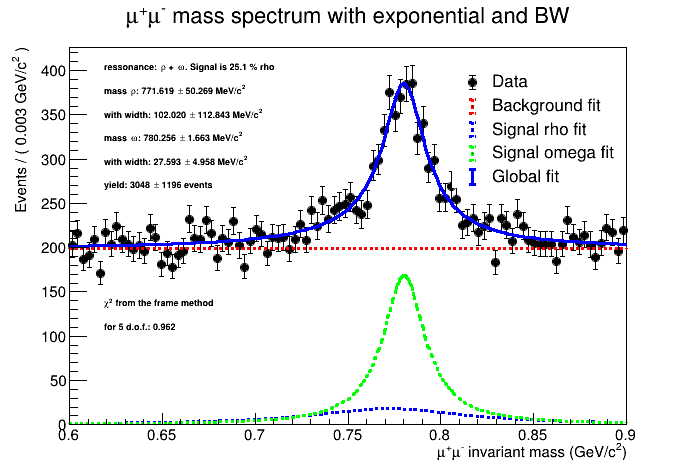

In [ ]:
#Making the BWSignal+ExponentialBKG fit with loose width restraints

#Making an unbinned Fit
#The main difference is that instead of feeding the model a RooDataHist
#we feed it a RooDataSet object

#Setting the mass limits of the peak
mmin = 0.6
mmax = 0.9

#Performing the mass cut a priori
#There are several ways of initiating a RooDataSet object
#One of them is by directly importing a TTree object
#If we do so, then we must define every variable in the TTree as a RooRealVar
#And we can perform the cuts directly on the RooDataSet when initiating it
#or afterwards with RooCut objects
masslist = []
for entry in f1.oniaTree:
  if mmin <= entry.dimuon_p4.M() <= mmax:
    masslist.append(entry.dimuon_p4.M())

#Create a Mass variable that RooFit can use, and importing the relevant dataset
mass = RooRealVar("mass", "#mu^{+}#mu^{-} invariant mass", mmin, mmax, "GeV/c^{2}")
ds = RooDataSet("ds","ds",RooArgSet(mass))

#We will set the entries one by one on the RooDataSet. This can be generalized
#for n dimensions with setValue() for each variable
#followed by ds.add(RooArgSet(mass, var0, var1, ..., varn))
for value in masslist:
  mass.setVal(value)
  ds.add(RooArgSet(mass))

#Simple way of checking the RooDataSet entries if you want to make sure that
#the RooDataSet has been correctly filled
for n in range(9):
  ds.get(n).Print("v")

#Define background model (exponential) and its parameters I chose this because everythign in particle physics are exponentials
Lambda = RooRealVar("lambda", "lambda", -30, -50, -0.0000000001)
background = RooExponential("background", "background", mass, Lambda)

#Define signal model (BW) and its parameters
mean1 = RooRealVar("mean1", "mean1", 0.775, 0.6, 0.8)
width1 = RooRealVar("width1", "width1", 0.149,0.07,0.2)
mean2 = RooRealVar("mean2", "mean2", 0.782, 0.6, 0.8)
width2 = RooRealVar("width2", "width2", 0.00849,0.00001,0.05)
gauss1 = RooBreitWigner("signal1", "signal1", mass, mean1, width1)
gauss2 = RooBreitWigner("signal2", "signal2", mass, mean2, width2)
frac = RooRealVar("frac","fraction of signal that is rho",0.5,0.2,0.8) ;
signal=RooAddPdf("sig","Signal",RooArgList(gauss1,gauss2),RooArgList(frac)) ;


#Define variables for number of signal and background events
n_signal_initial = 0.8*ds.sumEntries()
n_back_initial = 0.2*ds.sumEntries()
n_signal = RooRealVar("n_signal","n_signal",n_signal_initial,0.,ds.sumEntries())
n_back = RooRealVar("n_back","n_back",n_back_initial,0.,ds.sumEntries())

#Sum signal and background models
model = RooAddPdf("model", "model", RooArgList(signal, background), RooArgList(n_signal, n_back))

#Perform the fit
model.fitTo(ds)

#Plot the fit
frame = mass.frame()
frame.SetTitle("#mu^{+}#mu^{-} mass spectrum with exponential and BW")

ds.plotOn(frame,RooFit.Name("ds"))
model.plotOn(frame,RooFit.Name("modelSig1"),RooFit.Components("signal1"),RooFit.LineStyle(ROOT.kDashed))
model.plotOn(frame,RooFit.Name("modelSig2"),RooFit.Components("signal2"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kGreen))
model.plotOn(frame,RooFit.Name("modelBkg"),RooFit.Components("background"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kRed))
model.plotOn(frame,RooFit.Name("model"))

roofit_canvas = ROOT.TCanvas()
frame.Draw()

#Draw a caption
legend = TLegend(0.65,0.6,0.88,0.85)
legend.SetBorderSize(0)
legend.SetTextFont(40)
legend.SetTextSize(0.04)
legend.AddEntry(frame.findObject("ds"),"Data","1pe")
legend.AddEntry(frame.findObject("modelBkg"),"Background fit","1pe")
legend.AddEntry(frame.findObject("modelSig1"),ROOT.Form("Signal rho fit"),"1pe")
legend.AddEntry(frame.findObject("modelSig2"),ROOT.Form("Signal omega fit"),"1pe")
legend.AddEntry(frame.findObject("model"),"Global fit","1pe")
legend.Draw()

#Display info and fit results
L = TLatex()
L.SetNDC()

L.SetTextSize(0.02)
L.DrawLatex(0.15,0.85,ROOT.Form("ressonance: #rho + #omega. Signal is %3.1f %% rho" % (frac.getVal()*100)))
L.DrawLatex(0.15,0.80,ROOT.Form("mass #rho: %5.3f #pm %5.3f MeV/c^{2}" % (mean1.getVal()*1000,mean1.getError()*1000)))
L.DrawLatex(0.15,0.75,ROOT.Form("with width: %5.3f #pm %5.3f MeV/c^{2}" % (width1.getVal()*1000,width1.getError()*1000)))
L.DrawLatex(0.15,0.70,ROOT.Form("mass #omega: %5.3f #pm %5.3f MeV/c^{2}" % (mean2.getVal()*1000,mean2.getError()*1000)))
L.DrawLatex(0.15,0.65,ROOT.Form("with width: %5.3f #pm %5.3f MeV/c^{2}" % (width2.getVal()*1000,width2.getError()*1000)))
L.DrawLatex(0.15,0.60,ROOT.Form("yield: %.0f #pm %.0f events" % (n_signal.getVal(),n_signal.getError())))
free_parameters = 5
L.DrawLatex(0.15,0.35,ROOT.Form("#chi^{2} from the frame method"))
L.DrawLatex(0.15,0.30,ROOT.Form("for 5 d.o.f.: %.3f" % frame.chiSquare(free_parameters)))

roofit_canvas.Draw()


if sigmas are not well bounded, the fact that the signal hit can "associate" itself to either of the two particle gaussians will basically make any sigma/mean around the general area of the peak a viable prediction.


  1) 0x1056d550 RooRealVar:: mass = 0.847711  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1056d550 RooRealVar:: mass = 0.783413  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1056d550 RooRealVar:: mass = 0.600083  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1056d550 RooRealVar:: mass = 0.870979  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1056d550 RooRealVar:: mass = 0.765136  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1056d550 RooRealVar:: mass = 0.697037  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1056d550 RooRealVar:: mass = 0.78984  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1056d550 RooRealVar:: mass = 0.801699  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x1056d550 RooRealVar:: mass = 0.64344  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
[#1] INFO:Minimization -- p.d.f. provides expect

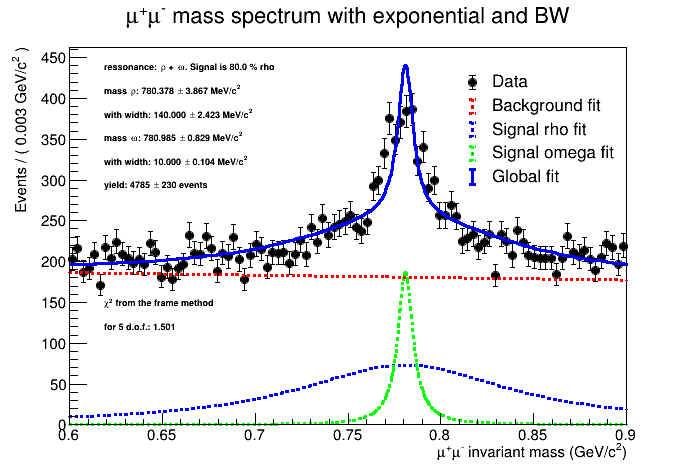

In [ ]:
#Making the BWSignal+ExponentialBKG fit with stricter width restraints

#Making an unbinned Fit
#The main difference is that instead of feeding the model a RooDataHist
#we feed it a RooDataSet object

#Setting the mass limits of the peak
mmin = 0.6
mmax = 0.9

#Performing the mass cut a priori
#There are several ways of initiating a RooDataSet object
#One of them is by directly importing a TTree object
#If we do so, then we must define every variable in the TTree as a RooRealVar
#And we can perform the cuts directly on the RooDataSet when initiating it
#or afterwards with RooCut objects
masslist = []
for entry in f1.oniaTree:
  if mmin <= entry.dimuon_p4.M() <= mmax:
    masslist.append(entry.dimuon_p4.M())

#Create a Mass variable that RooFit can use, and importing the relevant dataset
mass = RooRealVar("mass", "#mu^{+}#mu^{-} invariant mass", mmin, mmax, "GeV/c^{2}")
ds = RooDataSet("ds","ds",RooArgSet(mass))

#We will set the entries one by one on the RooDataSet. This can be generalized
#for n dimensions with setValue() for each variable
#followed by ds.add(RooArgSet(mass, var0, var1, ..., varn))
for value in masslist:
  mass.setVal(value)
  ds.add(RooArgSet(mass))

#Simple way of checking the RooDataSet entries if you want to make sure that
#the RooDataSet has been correctly filled
for n in range(9):
  ds.get(n).Print("v")

#Define background model (exponential) and its parameters I chose this because everythign in particle physics are exponentials
Lambda = RooRealVar("lambda", "lambda", -30, -50, -0.0000000001)
background = RooExponential("background", "background", mass, Lambda)

#Define signal model (BW) and its parameters
mean1 = RooRealVar("mean1", "mean1", 0.775, 0.6, 0.8)
width1 = RooRealVar("width1", "width1", 0.149,0.14,0.155)
mean2 = RooRealVar("mean2", "mean2", 0.782, 0.6, 0.8)
width2 = RooRealVar("width2", "width2", 0.00849,0.005,0.01)
gauss1 = RooBreitWigner("signal1", "signal1", mass, mean1, width1)
gauss2 = RooBreitWigner("signal2", "signal2", mass, mean2, width2)
frac = RooRealVar("frac","fraction of signal that is rho",0.5,0.2,0.8) ;
signal=RooAddPdf("sig","Signal",RooArgList(gauss1,gauss2),RooArgList(frac)) ;


#Define variables for number of signal and background events
n_signal_initial = 0.8*ds.sumEntries()
n_back_initial = 0.2*ds.sumEntries()
n_signal = RooRealVar("n_signal","n_signal",n_signal_initial,0.,ds.sumEntries())
n_back = RooRealVar("n_back","n_back",n_back_initial,0.,ds.sumEntries())

#Sum signal and background models
model = RooAddPdf("model", "model", RooArgList(signal, background), RooArgList(n_signal, n_back))

#Perform the fit
model.fitTo(ds)

#Plot the fit
frame = mass.frame()
frame.SetTitle("#mu^{+}#mu^{-} mass spectrum with exponential and BW")

ds.plotOn(frame,RooFit.Name("ds"))
model.plotOn(frame,RooFit.Name("modelSig1"),RooFit.Components("signal1"),RooFit.LineStyle(ROOT.kDashed))
model.plotOn(frame,RooFit.Name("modelSig2"),RooFit.Components("signal2"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kGreen))
model.plotOn(frame,RooFit.Name("modelBkg"),RooFit.Components("background"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kRed))
model.plotOn(frame,RooFit.Name("model"))

roofit_canvas = ROOT.TCanvas()
frame.Draw()

#Draw a caption
legend = TLegend(0.65,0.6,0.88,0.85)
legend.SetBorderSize(0)
legend.SetTextFont(40)
legend.SetTextSize(0.04)
legend.AddEntry(frame.findObject("ds"),"Data","1pe")
legend.AddEntry(frame.findObject("modelBkg"),"Background fit","1pe")
legend.AddEntry(frame.findObject("modelSig1"),ROOT.Form("Signal rho fit"),"1pe")
legend.AddEntry(frame.findObject("modelSig2"),ROOT.Form("Signal omega fit"),"1pe")
legend.AddEntry(frame.findObject("model"),"Global fit","1pe")
legend.Draw()

#Display info and fit results
L = TLatex()
L.SetNDC()

L.SetTextSize(0.02)
L.DrawLatex(0.15,0.85,ROOT.Form("ressonance: #rho + #omega. Signal is %3.1f %% rho" % (frac.getVal()*100)))
L.DrawLatex(0.15,0.80,ROOT.Form("mass #rho: %5.3f #pm %5.3f MeV/c^{2}" % (mean1.getVal()*1000,mean1.getError()*1000)))
L.DrawLatex(0.15,0.75,ROOT.Form("with width: %5.3f #pm %5.3f MeV/c^{2}" % (width1.getVal()*1000,width1.getError()*1000)))
L.DrawLatex(0.15,0.70,ROOT.Form("mass #omega: %5.3f #pm %5.3f MeV/c^{2}" % (mean2.getVal()*1000,mean2.getError()*1000)))
L.DrawLatex(0.15,0.65,ROOT.Form("with width: %5.3f #pm %5.3f MeV/c^{2}" % (width2.getVal()*1000,width2.getError()*1000)))
L.DrawLatex(0.15,0.60,ROOT.Form("yield: %.0f #pm %.0f events" % (n_signal.getVal(),n_signal.getError())))
free_parameters = 5
L.DrawLatex(0.15,0.35,ROOT.Form("#chi^{2} from the frame method"))
L.DrawLatex(0.15,0.30,ROOT.Form("for 5 d.o.f.: %.3f" % frame.chiSquare(free_parameters)))

roofit_canvas.Draw()


  1) 0x14f4cef0 RooRealVar:: mass = 0.847711  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14f4cef0 RooRealVar:: mass = 0.783413  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14f4cef0 RooRealVar:: mass = 0.600083  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14f4cef0 RooRealVar:: mass = 0.870979  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14f4cef0 RooRealVar:: mass = 0.765136  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14f4cef0 RooRealVar:: mass = 0.697037  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14f4cef0 RooRealVar:: mass = 0.78984  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14f4cef0 RooRealVar:: mass = 0.801699  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x14f4cef0 RooRealVar:: mass = 0.64344  L(0.6 - 0.9) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
[#1] INFO:Minimization -- p.d.f. provides expect

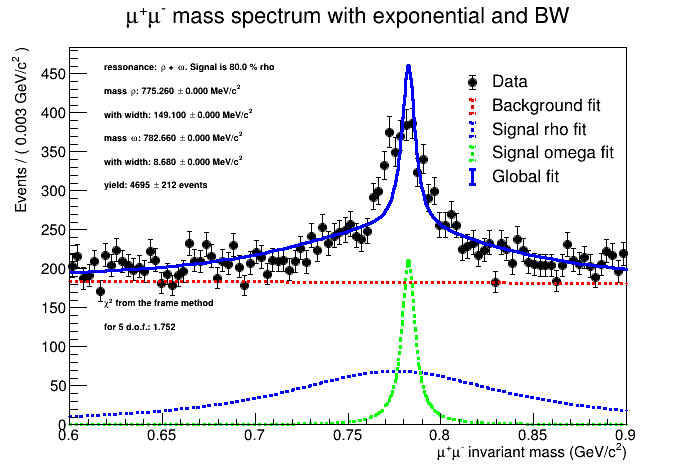

In [ ]:
#Making the BWSignal+ExponentialBKG fit with fixed BWs to study frac

#Making an unbinned Fit
#The main difference is that instead of feeding the model a RooDataHist
#we feed it a RooDataSet object

#Setting the mass limits of the peak
mmin = 0.6
mmax = 0.9

#Performing the mass cut a priori
#There are several ways of initiating a RooDataSet object
#One of them is by directly importing a TTree object
#If we do so, then we must define every variable in the TTree as a RooRealVar
#And we can perform the cuts directly on the RooDataSet when initiating it
#or afterwards with RooCut objects
masslist = []
for entry in f1.oniaTree:
  if mmin <= entry.dimuon_p4.M() <= mmax:
    masslist.append(entry.dimuon_p4.M())

#Create a Mass variable that RooFit can use, and importing the relevant dataset
mass = RooRealVar("mass", "#mu^{+}#mu^{-} invariant mass", mmin, mmax, "GeV/c^{2}")
ds = RooDataSet("ds","ds",RooArgSet(mass))

#We will set the entries one by one on the RooDataSet. This can be generalized
#for n dimensions with setValue() for each variable
#followed by ds.add(RooArgSet(mass, var0, var1, ..., varn))
for value in masslist:
  mass.setVal(value)
  ds.add(RooArgSet(mass))

#Simple way of checking the RooDataSet entries if you want to make sure that
#the RooDataSet has been correctly filled
for n in range(9):
  ds.get(n).Print("v")

#Define background model (exponential) and its parameters I chose this because everythign in particle physics are exponentials
Lambda = RooRealVar("lambda", "lambda", -30, -50, -0.0000000001)
background = RooExponential("background", "background", mass, Lambda)

#Define signal model (BW) and its parameters
mean1 = RooRealVar("mean1", "mean1", 0.77526, 0.77526-0.0000001, 0.77526+0.0000001)
width1 = RooRealVar("width1", "width1", 0.1491,0.1491-0.0000001,0.1491+0.0000001)#FWHM= particle width= 2.4 sigma in a gaussian, for rho should be aroun 65MeV
mean2 = RooRealVar("mean2", "mean2", 0.78266,0.78266-0.0000001, 0.78266+0.0000001)
width2 = RooRealVar("width2", "width2", 0.00868,0.00868-0.0000001,0.00868+0.0000001)#FWHM= particle width= 2.4 sigma in a gaussian, for omega should be around 3 MeV
gauss1 = RooBreitWigner("signal1", "signal1", mass, mean1, width1)
gauss2 = RooBreitWigner("signal2", "signal2", mass, mean2, width2)
frac = RooRealVar("frac","fraction of signal that is rho",0.5,0.2,0.8) ;
signal=RooAddPdf("sig","Signal",RooArgList(gauss1,gauss2),RooArgList(frac)) ;


#Define variables for number of signal and background events
n_signal_initial = 0.8*ds.sumEntries()
n_back_initial = 0.2*ds.sumEntries()
n_signal = RooRealVar("n_signal","n_signal",n_signal_initial,0.,ds.sumEntries())
n_back = RooRealVar("n_back","n_back",n_back_initial,0.,ds.sumEntries())

#Sum signal and background models
model = RooAddPdf("model", "model", RooArgList(signal, background), RooArgList(n_signal, n_back))

#Perform the fit
model.fitTo(ds)

#Plot the fit
frame = mass.frame()
frame.SetTitle("#mu^{+}#mu^{-} mass spectrum with exponential and BW")

ds.plotOn(frame,RooFit.Name("ds"))
model.plotOn(frame,RooFit.Name("modelSig1"),RooFit.Components("signal1"),RooFit.LineStyle(ROOT.kDashed))
model.plotOn(frame,RooFit.Name("modelSig2"),RooFit.Components("signal2"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kGreen))
model.plotOn(frame,RooFit.Name("modelBkg"),RooFit.Components("background"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kRed))
model.plotOn(frame,RooFit.Name("model"))

roofit_canvas = ROOT.TCanvas()
frame.Draw()

#Draw a caption
legend = TLegend(0.65,0.6,0.88,0.85)
legend.SetBorderSize(0)
legend.SetTextFont(40)
legend.SetTextSize(0.04)
legend.AddEntry(frame.findObject("ds"),"Data","1pe")
legend.AddEntry(frame.findObject("modelBkg"),"Background fit","1pe")
legend.AddEntry(frame.findObject("modelSig1"),ROOT.Form("Signal rho fit"),"1pe")
legend.AddEntry(frame.findObject("modelSig2"),ROOT.Form("Signal omega fit"),"1pe")
legend.AddEntry(frame.findObject("model"),"Global fit","1pe")
legend.Draw()

#Display info and fit results
L = TLatex()
L.SetNDC()

L.SetTextSize(0.02)
L.DrawLatex(0.15,0.85,ROOT.Form("ressonance: #rho + #omega. Signal is %3.1f %% rho" % (frac.getVal()*100)))
L.DrawLatex(0.15,0.80,ROOT.Form("mass #rho: %5.3f #pm %5.3f MeV/c^{2}" % (mean1.getVal()*1000,mean1.getError()*1000)))
L.DrawLatex(0.15,0.75,ROOT.Form("with width: %5.3f #pm %5.3f MeV/c^{2}" % (width1.getVal()*1000,width1.getError()*1000)))
L.DrawLatex(0.15,0.70,ROOT.Form("mass #omega: %5.3f #pm %5.3f MeV/c^{2}" % (mean2.getVal()*1000,mean2.getError()*1000)))
L.DrawLatex(0.15,0.65,ROOT.Form("with width: %5.3f #pm %5.3f MeV/c^{2}" % (width2.getVal()*1000,width2.getError()*1000)))
L.DrawLatex(0.15,0.60,ROOT.Form("yield: %.0f #pm %.0f events" % (n_signal.getVal(),n_signal.getError())))
free_parameters = 5
L.DrawLatex(0.15,0.35,ROOT.Form("#chi^{2} from the frame method"))
L.DrawLatex(0.15,0.30,ROOT.Form("for 5 d.o.f.: %.3f" % frame.chiSquare(free_parameters)))

roofit_canvas.Draw()
mean1 = RooRealVar("mean1", "mean1", 0.77526, 0.77526-0.0000001, 0.77526+0.0000001)
sigma1 = RooRealVar("sigma1", "sigma1", 0.1491/2.355,0.1491/2.355-0.0000001,0.1491/2.355+0.0000001)#FWHM= particle width= 2.4 sigma in a gaussian, for rho should be aroun 65MeV
mean2 = RooRealVar("mean2", "mean2", 0.78266,0.78266-0.0000001, 0.78266+0.0000001)
sigma2 = RooRealVar("sigma2", "sigma2", 0.00868/2.355,0.00868/2.355-0.0000001,0.00868/2.355+0.0000001)#FWHM= particle width= 2.4 sigma in a gaussian, for omega should be around 3 MeV